In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

series1 = pd.Series([-3]*5, index=range(2, 11, 2))

series2 = pd.Series({'Bill': 31, 'Sarah': 28, 'Jane': 34, 'Joe': 26})

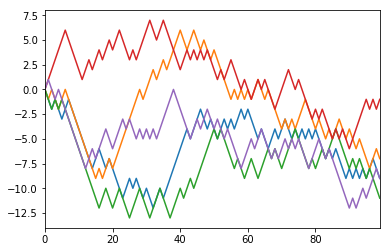

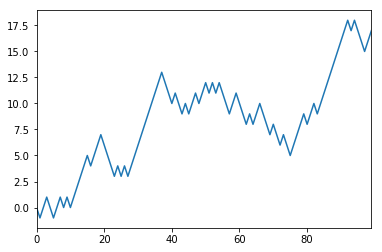

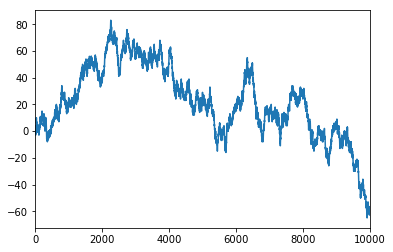

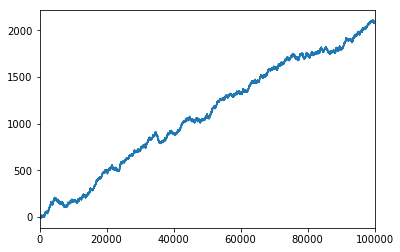

In [24]:
def display_random_walk(N, p, n):
    s = np.zeros(N)
    for i in range(n):
        s[1:] = np.random.binomial(1, p, size=(N - 1,)) * 2 - 1
        s = pd.Series(s)
        s = s.cumsum()
        s.plot()
    plt.show()

display_random_walk(100, 0.5, 5)

display_random_walk(100, 0.51, 1)

display_random_walk(10000, 0.51, 1)

display_random_walk(100000, 0.51, 1)

In [30]:
ID = range(9)
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']

studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})

In [108]:
studentInfo[(studentInfo['Age'] > 19)&(studentInfo['Sex'] == 'M')].loc[:, ['ID', 'Name']]

0    20
1    21
2    18
3    22
4    19
5    20
6    20
7    19
8    20
Name: Age, dtype: int64

In [33]:
pd.merge(studentInfo, otherInfo, on='ID')[studentInfo['Sex'] == 'M'][['ID', 'Age', 'GPA']]

,ID,Age,GPA
0,0,20,3.8
2,2,18,3.0
4,4,19,2.8
6,6,20,3.8
7,7,19,3.4


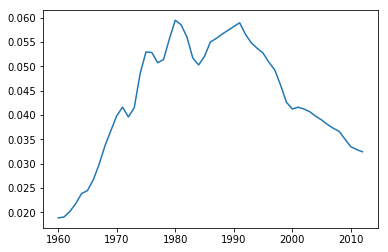

Year
1980    0.059500
1991    0.058978
1981    0.058582
1990    0.058203
1989    0.057410
Name: Crime Rate, dtype: float64
Total       1.063807e+07
Burglary    2.446286e+06
dtype: float64
Int64Index([1973, 1974], dtype='int64', name='Year')


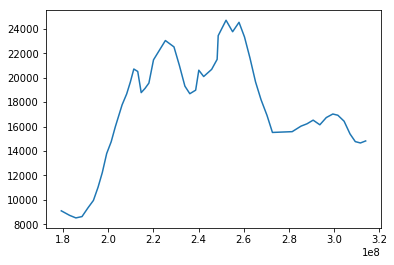

In [113]:
def Problem5():
    df = pd.read_csv('../crime_data.txt', header=1, index_col=0)
    df['Crime Rate'] = df['Total'] / df['Population']
    plt.plot(df.index, df['Crime Rate'])
    plt.show()
    top_5_crime_years = df.sort_values('Crime Rate', ascending=False).iloc[:5, -1]
    print(top_5_crime_years)
    average_total_and_burglary = df[['Total', 'Burglary']].mean(axis=0)
    print(average_total_and_burglary)
    total_below_burglary_above_years = df[(df['Total'] < average_total_and_burglary.loc['Total'])&(df['Burglary'] > average_total_and_burglary.loc['Burglary'])].index
    print(total_below_burglary_above_years)
    plt.plot(df.loc[:, 'Population'], df.loc[:, 'Murder'])
    plt.show()
    new_df = df[(1979 < df.index)&(df.index < 1990)].loc[:, ['Population', 'Violent', 'Robbery']]
    new_df.to_csv('./crime_subset.txt')
Problem5()